In [7]:
from data_loader import *
import numpy as np

# Watch for any changes in vocabulary.py, data_loader.py or model.py, and re-load it automatically.
%load_ext autoreload
%autoreload 2

import torch
from torchvision import transforms

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import torch.utils.data as data
import matplotlib.pyplot as plt
import random
import nltk

In [34]:
# Define a transform to pre-process the training images.
transform_train = transforms.Compose([ 
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.RandomCrop(224),                      # get 224x224 crop from random location
    transforms.RandomHorizontalFlip(),               # horizontally flip image with probability=0.5
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])


# Set the minimum word count threshold.
vocab_threshold = 5

# Specify the batch size.
batch_size = 10

In [35]:
transform = transforms.Compose([
    # you can add other transformations in this list
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406),
                         (0.229, 0.224, 0.225))
])

In [36]:
img_path = '/home/shashankv/Study/CS838/CS838_Project/data/flickr30k-images'
ann_path = '/home/shashankv/Study/CS838/CS838_Project/data/results_20130124.token'

dataset = Flickr30kData(img_root=img_path,
                       ann_file=ann_path,
                       transform=transform)

In [51]:
#Batch size should always be 1
data_loader = data.DataLoader(dataset=dataset,
                              batch_size=1,
                              shuffle=True,
                              )

dataloader_iterator = iter(data_loader)

In [52]:
for i in range(len(dataset)):
    img, caption_gloves = next(dataloader_iterator)
    break

tensor([[ 0.7256, -0.0488, -0.4511,  ...,  0.1529,  0.0274, -0.9291],
        [-0.4135,  0.0760,  0.0992,  ...,  0.1595, -0.1322,  0.0309],
        [-0.1976,  0.1671,  0.0504,  ..., -0.0148,  0.3631,  0.8191],
        ...,
        [ 0.0327, -0.3583,  0.3614,  ..., -0.3191, -0.3193,  0.0911],
        [ 0.2305, -0.3355, -0.1344,  ...,  0.0987, -0.0771, -0.1521],
        [-0.0212,  0.0102,  0.0233,  ...,  0.0498, -0.1476,  0.5743]])


In [53]:
caption_gloves.shape

torch.Size([1, 8, 300])

### Visualizing the Flickr30K data and target

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


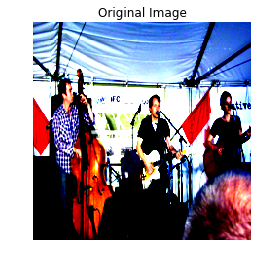

('Two people with guitars and one person with a cello play music and sing together in a white tent with a Canadian flag',)

In [33]:
plt.imshow(img[0].permute(1, 2, 0))
plt.title('Original Image')
plt.axis('off')
plt.show()

target

In [ ]:
target[0]

In [ ]:
random.sample(target, 1)

In [ ]:
a = dataset.annotations.values()

In [ ]:
a

In [ ]:
a = list(a)

In [ ]:
a

In [ ]:
tokens = nltk.tokenize.word_tokenize(str(target).lower())

In [ ]:
tokens

In [ ]:
target